In [ ]:
path='/content/drive/MyDrive/Churn_Modelling.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
churn_exited = df[df['Exited']==1]['Tenure']
churn_not_exited = df[df['Exited']==0]['Tenure']

In [ ]:
def visualize(x, y, xlabel):
  plt.figure(figsize=(10,5))
  plt.hist([x,y], color=['red','green'],label=['exit', 'not exit'])
  plt.xlabel(xlabel)
  plt.ylabel("No. of Customers")
  plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


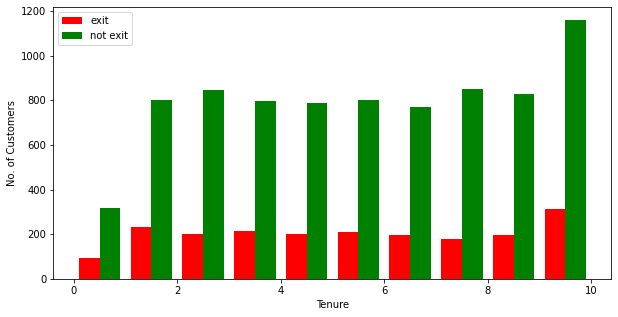

In [ ]:
visualize(churn_exited, churn_not_exited, "Tenure")

In [ ]:
df.drop(['RowNumber','Surname'], axis='columns', inplace=True)

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Gender'].replace(['Male','Female'],[1,0], inplace=True)

In [ ]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(data=df, columns=['Geography'])
df.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
cols=['CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cols]=scaler.fit_transform(df[cols])

In [ ]:
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.275616,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.326454,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.214421,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.542636,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,0.688778,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [ ]:
x=df.drop('Exited', axis='columns')
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5868 - accuracy: 0.7306
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7972
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7972
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7972
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7972
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7972
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.7972
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7980
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7980
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4619 - accura

In [ ]:
yp=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred=[]
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1585
           1       0.71      0.31      0.43       415

    accuracy                           0.83      2000
   macro avg       0.78      0.64      0.66      2000
weighted avg       0.81      0.83      0.80      2000

